### Liabraries

In [627]:
from bs4 import BeautifulSoup
import requests

import unidecode
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Get Data

In [628]:
hotel = []
reviews_score = []
reviews_text = []
reviews_number = []
room_type = []
bed_type = []
price = []
tax = []
address = []
metro = []


headers = {'User-Agent': ''}
base_url = "https://www.booking.com/searchresults.html?aid=355028&sid=7c99a75c7fd87553939b7091562675ac&tmpl=searchresults&checkin_month=5&checkin_monthday=21&checkin_year=2021&checkout_month=5&checkout_monthday=22&checkout_year=2021&city=-782831&class_interval=1&dest_id=-782831&dest_type=city&dtdisc=0&from_sf=5&group_adults=1&group_children=0&inac=0&index_postcard=0&label_click=undef&no_rooms=1&postcard=0&raw_dest_type=city&room1=A&sb_price_type=total&shw_aparth=1&slp_r_match=0&src=searchresults&src_elem=sb&srpvid=10c6811eb70b015c&ss=Dubai&ss_all=0&ssb=empty&sshis=0&ssne=Dubai&ssne_untouched=Dubai&top_ufis=1&sig=v1I39mrjER&rows=25&offset="

for page in range(0, 900, 25):
    
    response = requests.get(base_url+str(page), headers=headers, timeout=5)

    soup = BeautifulSoup(response.content, 'lxml')

    for item in soup.select('.sr_property_block'):
        try:
            hotel.append(item.select('.sr-hotel__name')[0].get_text().strip())
        except Exception:
            hotel.append('')
        try:
            reviews_score.append(item.select('.bui-review-score__badge')[0].get_text().strip())
        except Exception:
            reviews_score.append('')
        try:
            reviews_text.append(item.select('.bui-review-score__title')[0].get_text().strip())
        except Exception:
            reviews_text.append('')
        try:
            reviews_number.append(item.select('.bui-review-score__text')[0].get_text().strip())
        except Exception:
            reviews_number.append('')
        try:
            room_type.append(item.select('.room_link')[0].get_text().strip())
        except Exception:
            room_type.append('')
        try:
            bed_type.append(item.select('.c-beds-configuration')[0].get_text().strip())
        except:
            bed_type.append('')
        try:
            price.append(item.select('.bui-u-sr-only')[1].get_text().strip())
        except Exception:
            price.append('')
        try:
            tax.append(item.select('.prd-taxes-and-fees-under-price')[0].get_text().strip())
        except Exception:
            tax.append('')
        try:  
            address.append(item.select('.bui-link')[0].get_text().strip())
        except Exception:
            address.append('')
        try:
            metro.append(item.select('.sr_card_address_line__item')[1].get_text().strip())
        except Exception:
            metro.append('no metro')

In [629]:
len(hotel), len(reviews_score), len(reviews_text), len(reviews_number), len(room_type), len(bed_type), len(price), len(tax), len(address), len(metro)

(871, 871, 871, 871, 871, 871, 871, 871, 871, 871)

In [630]:
### convert scraped lists into a dataframe
best_hotel_deal = pd.DataFrame(data=list(zip(hotel,
                                             reviews_score, 
                                             reviews_text,
                                             reviews_number,
                                             room_type,
                                             bed_type,
                                             address,
                                             metro,
                                             price,
                                             tax)),
                               columns=['hotel', 
                                        'reviews_score', 
                                        'reviews_text', 
                                        'reviews_number', 
                                        'room_type', 
                                        'bed_type',
                                        'address', 
                                        'metro', 
                                        'price', 
                                        'tax'])

best_hotel_deal.head(10)

,hotel,reviews_score,reviews_text,reviews_number,room_type,bed_type,address,metro,price,tax
0,Dusit D2 Kenz Hotel Dubai,8.9,Fabulous,"4,364 reviews",One-Bedroom Suite\n – \n\n\n\n\n\nSleeps: 1 - ...,1 extra-large double bed,"Barsha Heights (Tecom) , Dubai\n\n\nShow on map",Metro access,Original price\nAZN 510\nCurrent price\nAZN 281,+AZN 77 taxes and charges
1,Hyatt Regency Creek Heights Residences,8.3,Very good,"7,726 reviews",Regency Room\n – \n\n\n\n\n\nSleeps: 1 - 3 guests,Multiple bed types,"Bur Dubai, Dubai\n\n\nShow on map",Metro access,Price\nAZN 139,+AZN 38 taxes and charges
2,Wyndham Dubai Marina,8.2,Very good,"8,964 reviews",Staycation Package - Superior Room with Free B...,Multiple bed types,"Dubai Marina, Dubai\n\n\nShow on map",no metro,Price\nAZN 194,+AZN 51 taxes and charges
3,Fairmont The Palm,8.3,Very good,"4,467 reviews","Fairmont Gold Lounge King, Balcony\n – \n\n\n\...",2 double beds,"Palm Jumeirah, Dubai\n\n\nShow on map",no metro,Price\nAZN 603,+AZN 145 taxes and charges
4,Kempinski Hotel Mall of the Emirates,8.9,Fabulous,"4,683 reviews",Superior Room\n – \n\n\n\n\n\nSleeps: 1 - 2 gu...,Multiple bed types,"Al Barsha, Dubai\n\n\nShow on map",Metro access,Original price\nAZN 374\nCurrent price\nAZN 345,+AZN 95 taxes and charges
5,Jumeirah Beach Hotel,8.5,Very good,"2,213 reviews",Ocean View Deluxe - Wild Wadi Waterpark™ acces...,1 extra-large double bed,"Umm Suqeim, Dubai\n\n\nShow on map",no metro,Price\nAZN 786,+AZN 186 taxes and charges
6,"Mandarin Oriental Jumeira, Dubai",9.3,Superb,988 reviews,Deluxe Skyline View King Room\n – \n\n\n\n\n\n...,1 extra-large double bed,"Jumeirah, Dubai\n\n\nShow on map",no metro,"Original price\nAZN 1,480\nCurrent price\nAZN ...",+AZN 348 taxes and charges
7,Swissôtel Al Ghurair Dubai,8.6,Fabulous,"4,674 reviews",Classic Twin Room with free beach access\n – \...,"3 beds\n(2 singles, 1 futon)","Deira, Dubai\n\n\nShow on map",Metro access,Price\nAZN 129,+AZN 38 taxes and charges
8,Jumeirah Al Naseem,8.7,Fabulous,"1,349 reviews",Resort Deluxe\n – \n\n\n\n\n\nSleeps: 1 - 2 gu...,1 extra-large double bed,"Umm Suqeim, Dubai\n\n\nShow on map",no metro,"Price\nAZN 1,156",+AZN 269 taxes and charges
9,"The Ritz-Carlton, Dubai",8.8,Fabulous,"1,855 reviews",Deluxe Room\n – \n\n\n\n\n\nSleeps: 1 - 3 guests,1 extra-large double bed,"Jumeirah Beach Residence, Dubai\n\n\nShow on map",no metro,Price\nAZN 971,+AZN 228 taxes and charges


In [631]:
### there are might be duplicates, will drop them
best_hotel_deal = best_hotel_deal.drop_duplicates()

In [632]:
best_hotel_deal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 870
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel           768 non-null    object
 1   reviews_score   768 non-null    object
 2   reviews_text    768 non-null    object
 3   reviews_number  768 non-null    object
 4   room_type       768 non-null    object
 5   bed_type        768 non-null    object
 6   address         768 non-null    object
 7   metro           768 non-null    object
 8   price           768 non-null    object
 9   tax             768 non-null    object
dtypes: object(10)
memory usage: 66.0+ KB


### Clean Data

**Reviews Score**

In [633]:
print("Number of listings that do not have reviews:")
len(best_hotel_deal[best_hotel_deal['reviews_score']==''])

Number of listings that do not have reviews:


196

In [634]:
print('-'*70)
print("Properties without reviews are most likely private type accomodations")
print('')

best_hotel_deal[best_hotel_deal['reviews_score']==''][['hotel', 'address', 'price']]

----------------------------------------------------------------------
Properties without reviews are most likely private type accomodations



,hotel,address,price
493,Five Palm Beach Villa with Private Pool,"Palm Jumeirah, Dubai\n\n\nShow on map","Price\nAZN 13,876"
539,Five Palm Two bedroom Suite Sea View,"Palm Jumeirah, Dubai\n\n\nShow on map","Price\nAZN 1,388"
588,Astonishing 1BR in Fabulous Cayan Tower,"Dubai Marina, Dubai\n\n\nShow on map",Original price\nAZN 214\nCurrent price\nAZN 203
595,1B-LoftC-104 by bnbmehomes,"Downtown Dubai, Dubai\n\n\nShow on map",Original price\nAZN 323\nCurrent price\nAZN 306
599,HiGuests Vacation Homes - Al Majara 2,"Dubai Marina, Dubai\n\n\nShow on map",Original price\nAZN 221\nCurrent price\nAZN 199
...,...,...,...
866,HiGuests Vacation Homes - Elite Residence Tower,"Dubai Marina, Dubai\n\n\nShow on map",Original price\nAZN 242\nCurrent price\nAZN 211
867,Lux One bedroom Appartement in dubai for rent,"Jumeirah Lakes Towers, Dubai\n\n\nShow on map",Original price\nAZN 293\nCurrent price\nAZN 270
868,DEC,"Dubai Marina, Dubai\n\n\nShow on map",Original price\nAZN 463\nCurrent price\nAZN 426
869,Khaled alosmani,"Al Barsha, Dubai\n\n\nShow on map","Original price\nAZN 1,041\nCurrent price\nAZN 959"


In [635]:
print('-'*70)
print("I am interested in hotels only, will drop records which are not for Hotels (w/o reviews),\nend up with the set of the following ratings:")
print('')
best_hotel_deal = best_hotel_deal[best_hotel_deal['reviews_score']!=''].copy()
best_hotel_deal.reviews_score.unique()

----------------------------------------------------------------------
I am interested in hotels only, will drop records which are not for Hotels (w/o reviews),
end up with the set of the following ratings:



array(['8.9', '8.3', '8.2', '8.5', '9.3', '8.6', '8.7', '8.8', '8.1',
       '9.1', '9.0', '7.4', '9.2', '7.7', '7.9', '8.4', '8.0', '7.0',
       '7.2', '9.4', '7.5', '7.6', '7.8', '6.5', '6.2', '6.6', '4.9',
       '7.3', '6.8', '5.8', '6.4', '7.1', '6.3', '5.0', '6.1', '5.4',
       '6.0', '6.9', '5.3', '4.5', '5.9', '5.5', '3.9', '4.3', '5.6',
       '6.7', '9.7', '1.5', '5.2', '2.6', '4.4', '3.1', '9.5', '3.7',
       '5.1', '1.2', '3.8', '9.6', '4.0', '3.4', '3.6', '10', '9.9'],
      dtype=object)

In [636]:
### reviews_score: change to decimal

### function
def convert_reviews_score(text):
    review = float(text)
    return review

### apply function to df
best_hotel_deal.reviews_score = best_hotel_deal.reviews_score.apply(lambda x: convert_reviews_score(x))

**Reviews number**

In [637]:
print("This shall be numerical feature, convert accordingly:")
print('')
best_hotel_deal.reviews_number.unique()[:5]

This shall be numerical feature, convert accordingly:



array(['4,364 reviews', '7,726 reviews', '8,964 reviews', '4,467 reviews',
       '4,683 reviews'], dtype=object)

In [638]:
### function
def convert_reviews_number(text):
    cleaned_text = text.replace(' reviews', '').replace(",","")
    review = int(cleaned_text)
    return review

### apply function
best_hotel_deal.reviews_number = best_hotel_deal.reviews_number.apply(lambda x: convert_reviews_number(x))

**Reviews text**

In [639]:
print('-'*70)
print("Rating titled[review score] is not informative,\nlet's understand relation between score and rating:")
print('')
best_hotel_deal.reviews_text.unique()

----------------------------------------------------------------------
Rating titled[review score] is not informative,
let's understand relation between score and rating:



array(['Fabulous', 'Very good', 'Superb', 'Good', 'Review score',
       'Exceptional'], dtype=object)

In [640]:
print('-'*70)
print("Statistical summary for hotels guests rated as Exceptional")
print('')
best_hotel_deal[best_hotel_deal['reviews_text']=='Exceptional']['reviews_score'].describe()

----------------------------------------------------------------------
Statistical summary for hotels guests rated as Exceptional



count     7.000000
mean      9.771429
std       0.197605
min       9.500000
25%       9.650000
50%       9.700000
75%       9.950000
max      10.000000
Name: reviews_score, dtype: float64

In [641]:
print('-'*70)
print("Statistical summary for hotels guests rated as Superb")
print('')
best_hotel_deal[best_hotel_deal['reviews_text']=='Superb']['reviews_score'].describe()

----------------------------------------------------------------------
Statistical summary for hotels guests rated as Superb



count    42.000000
mean      9.109524
std       0.114358
min       9.000000
25%       9.000000
50%       9.100000
75%       9.200000
max       9.400000
Name: reviews_score, dtype: float64

In [642]:
print('-'*70)
print("Statistical summary for hotels guests rated as Fabulous")
print('')
best_hotel_deal[best_hotel_deal['reviews_text']=='Fabulous']['reviews_score'].describe()

----------------------------------------------------------------------
Statistical summary for hotels guests rated as Fabulous



count    91.000000
mean      8.732967
std       0.106515
min       8.600000
25%       8.600000
50%       8.700000
75%       8.800000
max       8.900000
Name: reviews_score, dtype: float64

In [643]:
print('-'*70)
print("Statistical summary for hotels guests rated as Very good")
print('')
best_hotel_deal[best_hotel_deal['reviews_text']=='Very good']['reviews_score'].describe()

----------------------------------------------------------------------
Statistical summary for hotels guests rated as Very good



count    184.000000
mean       8.264674
std        0.166618
min        8.000000
25%        8.100000
50%        8.300000
75%        8.400000
max        8.500000
Name: reviews_score, dtype: float64

In [644]:
print('-'*70)
print("Statistical summary for hotels guests rated as Good")
print('')
best_hotel_deal[best_hotel_deal['reviews_text']=='Good']['reviews_score'].describe()

----------------------------------------------------------------------
Statistical summary for hotels guests rated as Good



count    137.000000
mean       7.524818
std        0.304810
min        7.000000
25%        7.300000
50%        7.600000
75%        7.800000
max        7.900000
Name: reviews_score, dtype: float64

In [645]:
print('-'*70)
print("Statistical summary for hotels, guests did not rate [Review score]")
print('')
best_hotel_deal[best_hotel_deal['reviews_text']=='Review score']['reviews_score'].describe()

----------------------------------------------------------------------
Statistical summary for hotels, guests did not rate [Review score]



count    111.000000
mean       5.745045
std        1.146595
min        1.200000
25%        5.350000
50%        6.100000
75%        6.500000
max        6.900000
Name: reviews_score, dtype: float64

In [646]:
print("Hence [Review score] refers to lowest rating by guests.")
print("")
print("Reviews text feature might be redundant as we have reviews score,")
print("However I will keep it for time being, but will change format to ordered 6-1")
print('')

Hence [Review score] refers to lowest rating by guests.

Reviews text feature might be redundant as we have reviews score,
However I will keep it for time being, but will change format to ordered 6-1



In [647]:
### function
def convert_reviews_text(text):
    if text=='Exceptional':
        rating = 6
    elif text=='Superb':
        rating = 5
    elif text=='Fabulous':
        rating = 4
    elif text=='Very good':
        rating = 3
    elif text=='Good':
        rating = 2
    else:
        rating = 1
    return rating

### apply function
best_hotel_deal.reviews_text = best_hotel_deal.reviews_text.apply(lambda x: convert_reviews_text(x))

**Room type**

In [648]:
### need to clean it further:
rooms = ['Deluxe', 'King', 'Regency', 'Superior', 'Premium', 
         'Standard', 'Twin Room', '2 Bedroom', 'Two-Bedroom', 
         'Studio','One-Bedroom', 'Classic', 'Suite']### all others to be classified 'other'

### function
def clean_room_type(text):
    room_cleaned = text.splitlines()[0]
    if room_cleaned in rooms:
        room = room_cleaned
    else:
        room = 'other'
    return room

### apply function
best_hotel_deal.room_type = best_hotel_deal.room_type.apply(lambda x: clean_room_type(x))

**Bed type**

In [649]:
### beds classification list
beds = ['1 extra-large double bed', 
        '1 large double bed',
        '1 double bed',
        '1 single bed',
        '2 large double beds',
        '2 double beds',
        '2 single beds']### all others to be classified 'other'

### function
def convert_bed_type(text):
    try:
        bed_cleaned = text.splitlines()[0]
    except Exception:
        bed_cleaned = text.splitlines()
    if bed_cleaned in beds:
        bed = bed_cleaned
    else:
        bed = 'other'
    return bed

### apply function
best_hotel_deal.bed_type = best_hotel_deal.bed_type.apply(lambda x: convert_bed_type(x))

**Address**

In [650]:
### function
def clean_address(text):
    address = text.split(",")[0].splitlines()[0]
    return address

### apply function
best_hotel_deal.address = best_hotel_deal.address.apply(lambda x: clean_address(x))

**Price**

In [651]:
### prices are in AZN

### function
def clean_price(text):
    import unidecode
    cleaned_price = unidecode.unidecode(text.splitlines()[-1]).replace("AZN", "").replace(",","").strip()
    cleaned_price = int(cleaned_price)
    return cleaned_price

### apply function
best_hotel_deal.price = best_hotel_deal.price.apply(lambda x: clean_price(x))

**Tax**

In [652]:
### tax in AZN

### function
def clean_tax(text):
    import unidecode
    if "Includes" in text:
        cleaned_tax = 0
    else:
        cleaned_tax = unidecode.unidecode(text).\
            replace("taxes and charges", "").\
            replace("+AZN", "").\
            replace("Additional charges may apply", "").\
            replace(",","").strip()
        if cleaned_tax == '':
            cleaned_tax = 0
        else:
            cleaned_tax = int(cleaned_tax)
    return cleaned_tax

### apply function
best_hotel_deal.tax = best_hotel_deal.tax.apply(lambda x: clean_tax(x))

**Total Price in USD**

In [653]:
### add price and tax and convert total price to USD
best_hotel_deal['total_price_USD'] = best_hotel_deal['price'] + best_hotel_deal['tax']
best_hotel_deal['total_price_USD'] = best_hotel_deal['total_price_USD'].apply(lambda x: round(x/1.7))
best_hotel_deal

,hotel,reviews_score,reviews_text,reviews_number,room_type,bed_type,address,metro,price,tax,total_price_USD
0,Dusit D2 Kenz Hotel Dubai,8.9,4,4364,other,1 extra-large double bed,Barsha Heights (Tecom),Metro access,281,77,211
1,Hyatt Regency Creek Heights Residences,8.3,3,7726,other,other,Bur Dubai,Metro access,139,38,104
2,Wyndham Dubai Marina,8.2,3,8964,other,other,Dubai Marina,no metro,194,51,144
3,Fairmont The Palm,8.3,3,4467,other,2 double beds,Palm Jumeirah,no metro,603,145,440
4,Kempinski Hotel Mall of the Emirates,8.9,4,4683,other,other,Al Barsha,Metro access,345,95,259
...,...,...,...,...,...,...,...,...,...,...,...
763,Studio with Burj View in Address Dubai Mall,8.3,3,3,other,1 double bed,Downtown Dubai,no metro,301,114,244
765,2B-CW10-703 by bnbmehomes,9.0,5,3,other,other,Al Wasl,no metro,630,146,456
779,Room for travellers,7.0,2,3,other,1 single bed,Al Qusais,no metro,46,43,52
784,2b-GrandeurMughal-30GA by bnbmehomes,6.3,1,3,other,other,Palm Jumeirah,no metro,710,147,504


### Exploratory Data Analysis

In [654]:
best_hotel_deal.describe()

,reviews_score,reviews_text,reviews_number,price,tax,total_price_USD
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,7.753497,2.715035,1525.909091,213.594406,61.723776,161.935315
std,1.227361,1.224781,2023.756071,293.434007,82.802979,214.689768
min,1.200000,1.000000,3.000000,6.000000,0.000000,8.000000
25%,7.200000,2.000000,140.500000,56.750000,19.000000,44.750000
50%,8.100000,3.000000,905.000000,92.000000,28.000000,70.500000
75%,8.500000,3.000000,1991.000000,238.250000,73.000000,185.250000
max,10.000000,6.000000,14701.000000,2544.000000,778.000000,1839.000000


In [655]:
print('-'*70)
print("Most expensive hotel priced at USD 2405 per night,\nthe cheapest place priced at USD 8 per night")
print('-'*70)

----------------------------------------------------------------------
Most expensive hotel priced at USD 2405 per night,
the cheapest place priced at USD 8 per night
----------------------------------------------------------------------


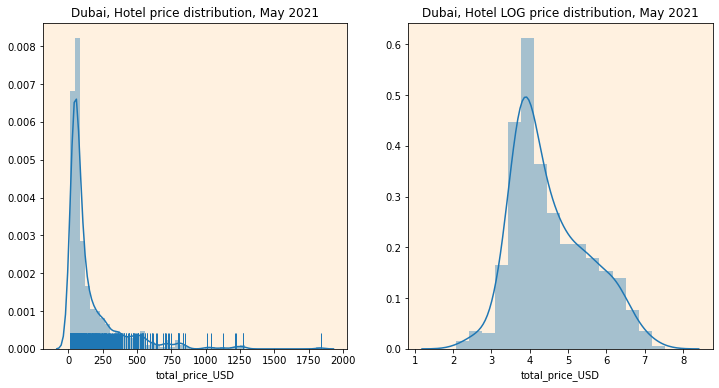

In [656]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['axes.facecolor'] = '#FFF1E0'

fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(best_hotel_deal.total_price_USD, rug=True, ax=ax[0]).\
set_title("Dubai, Hotel price distribution, May 2021")

sns.distplot(np.log(best_hotel_deal.total_price_USD), ax=ax[1]).\
             set_title("Dubai, Hotel LOG price distribution, May 2021");

fig.show();

----------------------------------------------------------------------
Most expensive hotels do not have metro access.
----------------------------------------------------------------------


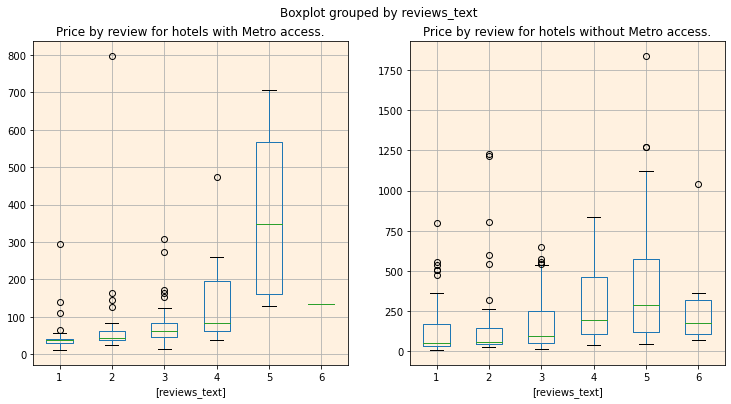

In [657]:
print('-'*70)
print("Most expensive hotels do not have metro access.")
print('-'*70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

best_hotel_deal[best_hotel_deal['metro']=='Metro access'].\
    boxplot(column = 'total_price_USD', 
            by = ['reviews_text'], 
            ax=ax1).set_title("Price by review for hotels with Metro access.")

best_hotel_deal[best_hotel_deal['metro']=='no metro'].\
    boxplot(column = 'total_price_USD', 
            by = ['reviews_text'], 
            ax=ax2).set_title("Price by review for hotels without Metro access.")

plt.show();

In [658]:
print("Apparently there are Very Good (rating 3) hotels with metro access below USD 50 price,\nand average (rating 1) hotels without metro and above USD 500 price.")
print('-'*70)

Apparently there are Very Good (rating 3) hotels with metro access below USD 50 price,
and average (rating 1) hotels without metro and above USD 500 price.
----------------------------------------------------------------------


Number of hotels by city location



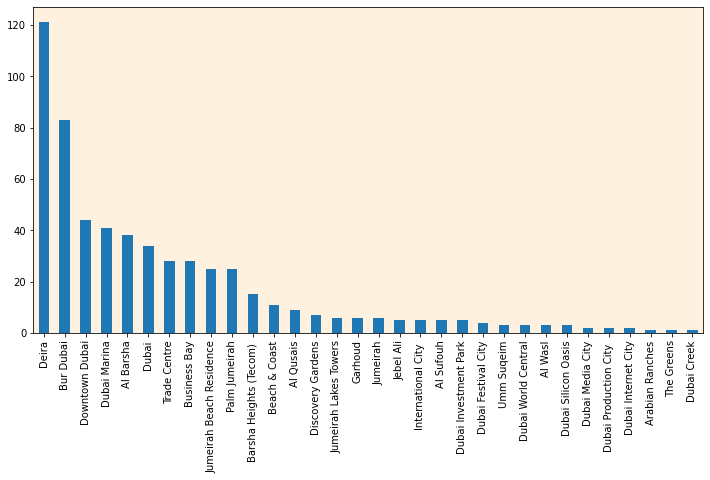

In [659]:
### ### let 's check distribution of hotels by location
print("Number of hotels by city location")
print('')
best_hotel_deal.address.value_counts().plot(kind='bar');

Except for Downtown Dubai and Palm Jumeirah, there is availability of hotels with price below 100 USD
in every part of the city



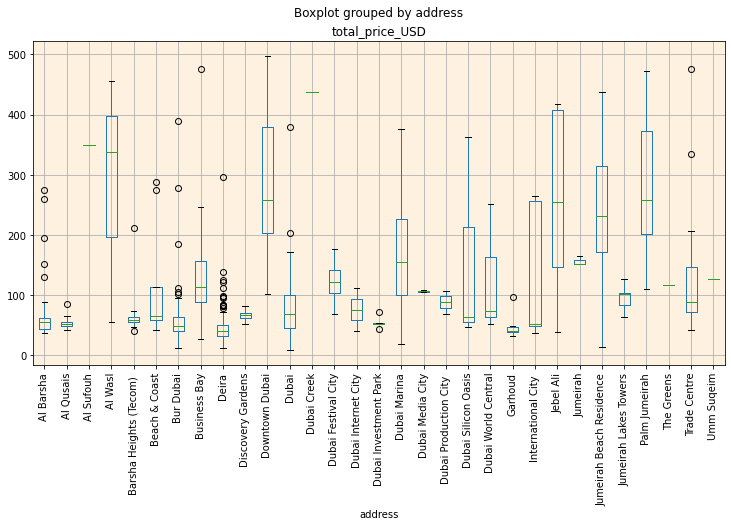

In [660]:
print("Except for Downtown Dubai and Palm Jumeirah, there is availability of hotels with price below 100 USD\nin every part of the city")
print('')

best_hotel_deal[(best_hotel_deal['total_price_USD']<500)].\
    boxplot(column='total_price_USD', by='address', figsize=(12, 6), rot=90);

----------------------------------------------------------------------


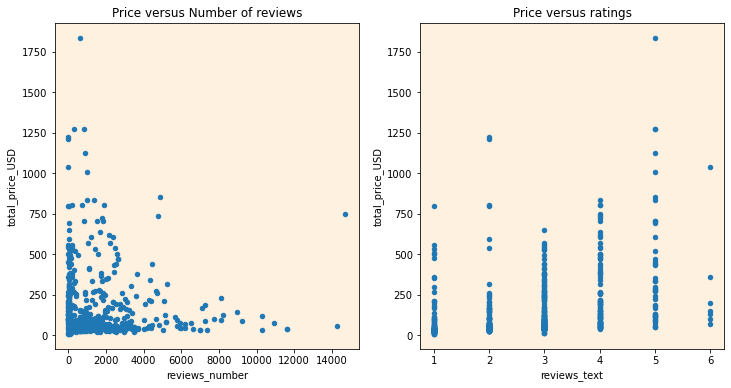

In [661]:
print('-'*70)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

best_hotel_deal.plot.scatter(x='reviews_number', 
                             y = 'total_price_USD', 
                             ax=ax1).set_title("Price versus Number of reviews")

best_hotel_deal.plot.scatter(x='reviews_text', 
                             y = 'total_price_USD', 
                             ax=ax2).set_title("Price versus ratings")

plt.show();

### Choosing best deal to cater to my needs

In [662]:
print("""
Narrowing down my search to hotels with 'Very Good' (3) rating, 
metro access, price below 50 USD with locations at Garhood, 
Al Barsha or Trade Centre, one double bed.
""")

best_hotel_deal[(best_hotel_deal['metro']=='Metro access') & 
                (best_hotel_deal['reviews_text']==3) &  
                (best_hotel_deal['total_price_USD']<50)].\
                sort_values('total_price_USD')\
                [['hotel', 'reviews_score', 
                  'reviews_number', 'room_type', 
                  'bed_type', 'address', 'total_price_USD']]


Narrowing down my search to hotels with 'Very Good' (3) rating, 
metro access, price below 50 USD with locations at Garhood, 
Al Barsha or Trade Centre, one double bed.



,hotel,reviews_score,reviews_number,room_type,bed_type,address,total_price_USD
656,Bedspace Sharing in Bur Dubai,8.1,7,other,other,Bur Dubai,14
156,Howard Johnson Plaza by Wyndham Dubai Deira,8.1,5006,other,1 extra-large double bed,Deira,31
168,Premier Inn Dubai International Airport,8.4,10284,other,1 large double bed,Garhoud,32
271,Super 8 by Wyndham Dubai Deira,8.4,490,other,1 large double bed,Deira,34
196,Emirates Concorde Hotel & Apartments,8.0,6993,other,other,Deira,34
228,Emirates Concorde Hotel & Apartments,8.0,6993,other,other,Deira,35
465,Al Khoory Inn Bur Dubai,8.3,1549,other,1 large double bed,Bur Dubai,39
99,Flora Inn Hotel Dubai Airport,8.5,11609,other,other,Garhoud,39
115,Flora Inn Hotel Dubai Airport,8.5,11609,other,other,Garhoud,40
299,Signature Hotel Al Barsha,8.1,2294,other,other,Al Barsha,41


In [664]:
#!jupyter nbconvert --to  pdf --TemplateExporter.exclude_input=True BestHotelDeal.ipynb